In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

In [2]:
import zipfile
import os
import pandas as pd
from scipy.io import arff

zip_file_path = '/content/archive (7).zip'
extract_path = '/content/extracted_data'
file_to_extract = 'Pumpkin_Seeds_Dataset/Pumpkin_Seeds_Dataset.arff'

# Create the extraction directory if it doesn't exist
os.makedirs(extract_path, exist_ok=True)

# Extract the specific file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extract(file_to_extract, extract_path)

# Construct the full path to the extracted file
extracted_file_path = os.path.join(extract_path, file_to_extract)

# Load the .arff file using scipy
data, meta = arff.loadarff(extracted_file_path)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data)

# Decode byte strings to regular strings for object columns
for col in df.select_dtypes(['object']):
    df[col] = df[col].str.decode('utf-8')

display(df.head())

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276.0,888.242,326.1485,220.2388,56831.0,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,CERCEVELIK
1,76631.0,1068.146,417.1932,234.2289,77280.0,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,CERCEVELIK
2,71623.0,1082.987,435.8328,211.0457,72663.0,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,CERCEVELIK
3,66458.0,992.051,381.5638,222.5322,67118.0,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,CERCEVELIK
4,66107.0,998.146,383.8883,220.4545,67117.0,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,CERCEVELIK


In [3]:
df.shape

(2500, 13)

In [4]:
df.isnull().sum()

,0
Area,0
Perimeter,0
Major_Axis_Length,0
Minor_Axis_Length,0
Convex_Area,0
Equiv_Diameter,0
Eccentricity,0
Solidity,0
Extent,0
Roundness,0


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   float64
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   float64
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(12), object(1)
memory usage: 254.0+ KB


In [7]:
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [8]:
df.nunique()

,0
Area,2424
Perimeter,2490
Major_Axis_Length,2499
Minor_Axis_Length,2497
Convex_Area,2445
Equiv_Diameter,2424
Eccentricity,1295
Solidity,166
Extent,1392
Roundness,1480


In [9]:
df.tail()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
2495,79637.0,1224.710,533.1513,190.4367,80381.0,318.4289,0.9340,0.9907,0.4888,0.6672,2.7996,0.5973,URGUP_SIVRISI
2496,69647.0,1084.318,462.9416,191.8210,70216.0,297.7874,0.9101,0.9919,0.6002,0.7444,2.4134,0.6433,URGUP_SIVRISI
2497,87994.0,1210.314,507.2200,222.1872,88702.0,334.7199,0.8990,0.9920,0.7643,0.7549,2.2828,0.6599,URGUP_SIVRISI
2498,80011.0,1182.947,501.9065,204.7531,80902.0,319.1758,0.9130,0.9890,0.7374,0.7185,2.4513,0.6359,URGUP_SIVRISI
2499,84934.0,1159.933,462.8951,234.5597,85781.0,328.8485,0.8621,0.9901,0.7360,0.7933,1.9735,0.7104,URGUP_SIVRISI


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [11]:
df['Class'].unique()

array(['CERCEVELIK', 'URGUP_SIVRISI'], dtype=object)

In [12]:
df.replace({'Class': {'CERCEVELIK': 0, 'URGUP_SIVRISI': 1}}, inplace=True)

/tmp/ipython-input-2364035062.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace({'Class': {'CERCEVELIK': 0, 'URGUP_SIVRISI': 1}}, inplace=True)


In [13]:
corr = df.corr()

<Axes: >

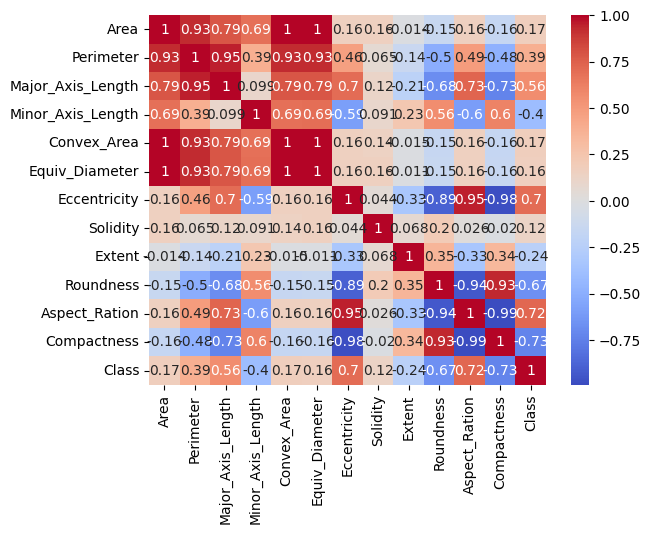

In [14]:
sns.heatmap(corr, annot = True, cmap = 'coolwarm')

In [15]:
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with all numerical columns.
# If your DataFrame is named something else, replace 'df' accordingly.

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply scaling to all columns of the DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

print("Scaled DataFrame Head:")
print(df_scaled.head())

Scaled DataFrame Head:
       Area  Perimeter  Major_Axis_Length  Minor_Axis_Length  Convex_Area  \
0 -1.784703  -2.215755          -2.320224          -0.238536    -1.793218   
1 -0.294780  -0.568804          -0.700916           0.362089    -0.307244   
2 -0.661350  -0.432940          -0.369395          -0.633215    -0.642749   
3 -1.039412  -1.265424          -1.334616          -0.140076    -1.045689   
4 -1.065105  -1.209626          -1.293272          -0.229276    -1.045762   

   Equiv_Diameter  Eccentricity  Solidity    Extent  Roundness  Aspect_Ration  \
0       -1.921174     -2.729935  0.202812  0.855406   1.873763      -1.775063   
1       -0.259343     -0.739163  0.603626  0.359523   0.938377      -0.824864   
2       -0.645380      0.310476 -1.085518  0.768380  -0.431615       0.074059   
3       -1.057939     -1.075756  0.202812  0.761812   1.020648      -1.035351   
4       -1.086548     -0.934033 -1.285925 -0.295634   0.755950      -0.950840   

   Compactness     Class  


In [22]:
X = df.drop(['Class'],axis=1)
y = df['Class']

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler

# Apply scaling only to the feature columns (X_train and X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert the scaled arrays back to DataFrames (optional, but can be helpful)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [20]:
models = {
    'dtc':DecisionTreeClassifier(),
    'rfc':RandomForestClassifier()}

In [25]:
for name,model in models.items():
    model.fit(X_train_scaled,y_train)
    ypred = model.predict(X_test_scaled)
    print(f"{name} with accuracy : {accuracy_score(y_test,ypred)} ")

dtc with accuracy : 0.816 
rfc with accuracy : 0.86 
